# Introduction:

## Problemt Statement

The primary goal of this project is to develop a Supervised Machine Learning model that can classify sonar returns as either a mine (M) or a rock (R). This is a binary classification problem with imbalanced classes, as the distribution of mines and rocks is not equal. The machine learning model should be trained to maximize accuracy and recall, with a special emphasis on minimizing false negatives, which could lead to potentially hazardous situations if mines are misclassified as rocks.

## Data

There are 208 observations with 60 input variables and 1 output variable. The variable names are as follows:

Sonar returns at different angles
…
Class (M for mine and R for rock)

Data was retrieved from "All Datastets for Practiving ML" on Kaggle, authored by koustubhk.

The dataset used is the "Class_Sonar.csv"

Direct Link - https://www.kaggle.com/datasets/kkhandekar/all-datasets-for-practicing-ml

## Data Cleaning

The data was left as is in order to allow EDA to determine classification importance for each Angle.


#  Import Libraries and data

In [1]:
#libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('dataset/Class_Sonar.csv')

In [3]:
df.head()

,Ang1,Ang2,Ang3,Ang4,Ang5,Ang6,Ang7,Ang8,Ang9,Ang10,...,Ang52,Ang53,Ang54,Ang55,Ang56,Ang57,Ang58,Ang59,Ang60,Class
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R


# EDA

## Class Distribution Count

A bar chart was generated to visualize the count of each class in the dataset, indicating that there are 111 instances of mines (M) and 97 instances of rocks (R).
This indicates a slight imbalance in the dataset, which could have implications for model training and evaluation.

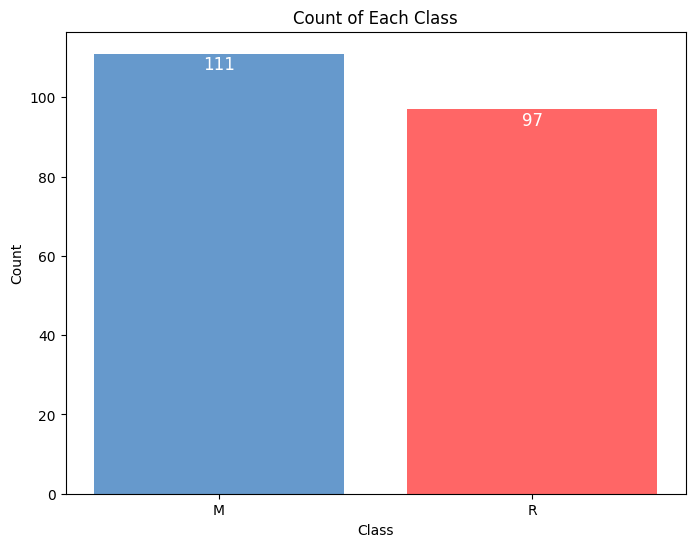

In [4]:
# Count the number of occurrences for each distinct value in the "Class" column
class_counts = df['Class'].value_counts()

# Create a bar chart
plt.figure(figsize=(8, 6))
colors = ['#6699CC' if value == 'M' else '#FF6666' for value in class_counts.index]  # Lighter blue and red colors
bars = plt.bar(class_counts.index, class_counts.values, color=colors)


# Add labels and a title
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Count of Each Class')

# Add count labels on top of each bar
for bar in bars:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() - 5,
             str(int(bar.get_height())), ha='center', va='bottom', color='white', fontsize=12)

# Show the plot
plt.show()

## Correlation Matrix of all Features

A correlation matrix was created to analyze the relationships between the 60 features.
The heatmap showed that features closer in sequence tend to have higher correlations. This could indicate some level of redundancy among adjacent features, potentially suggesting the need for feature selection or dimensionality reduction to improve model performance.

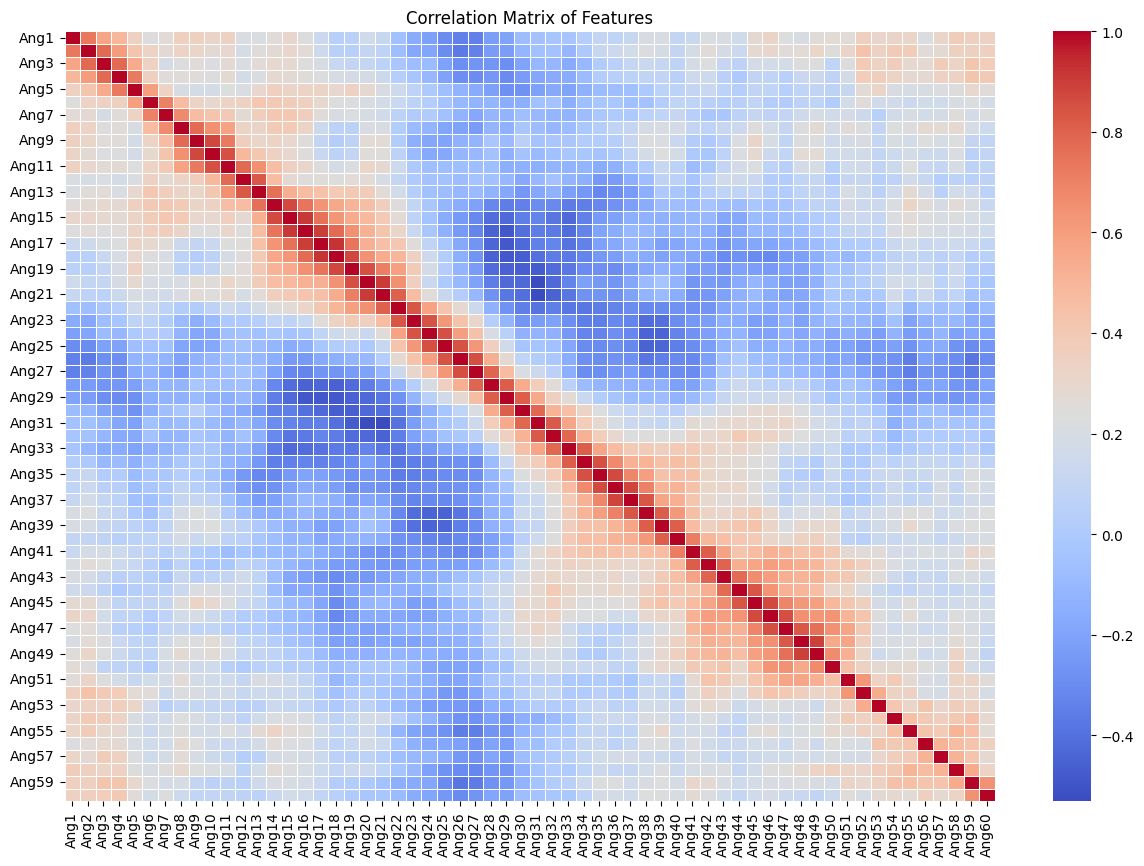

In [7]:
#Correlation Analysis
corr_matrix = df.iloc[:, :-1].corr()  # Exclude the class column
plt.figure(figsize=(15, 10))
sns.heatmap(corr_matrix, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix of Features')
plt.show()

## Feature Importance using Random Forest Model

A Random Forest model was trained to evaluate the importance of individual features.
The top 10 features contributing most to the model’s predictive power were identified. The most important features included Ang11, Ang12, Ang49, and others. This analysis provided insights into which features are the most informative in distinguishing between mines and rocks, which can guide the modeling process and help in reducing dimensionality

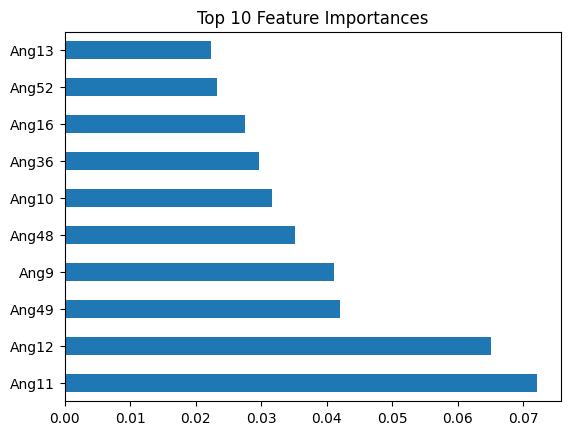

In [8]:
#FEATURE IMPORTANCE USING SIMPLE RANDOM FOREST MODEL
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split


# Prepare the data
X = df.drop('Class', axis=1)
y = df['Class'].apply(lambda x: 1 if x == 'M' else 0)  # Encode labels

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train RandomForest
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Plot feature importance
feature_importances = pd.Series(model.feature_importances_, index=X.columns)
feature_importances.nlargest(10).plot(kind='barh')
plt.title('Top 10 Feature Importances')
plt.show()


## Pair Plot analysis on top 5 features from RandomForest

The pair plot analysis provides insights into how different features are distributed and correlated with each other, as well as how well they differentiate between mines and rocks. The significant overlap between classes indicates the need for sophisticated models, such as SVM with RBF kernel or ensemble models, to improve classification accuracy.

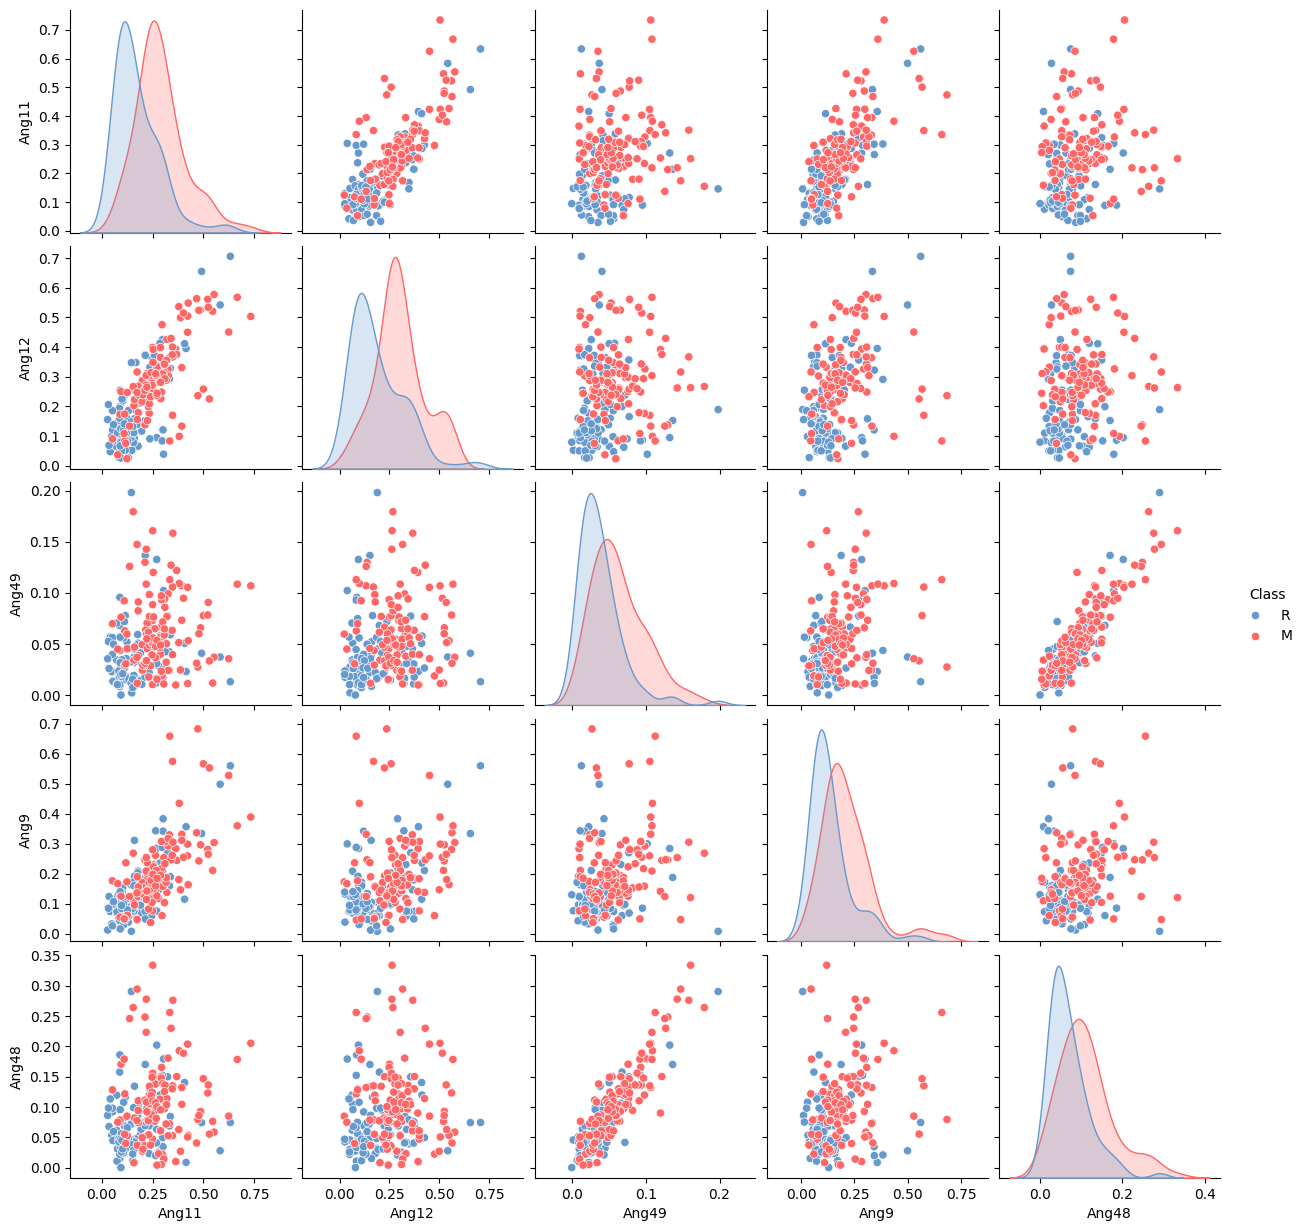

In [9]:
# Pair Plot on top 5 features by importance based on Feature Importance Scores from RandomForest
sns.pairplot(df, vars=['Ang11', 'Ang12', 'Ang49', 'Ang9', 'Ang48'], hue='Class', palette=['#6699CC', '#FF6666'])
plt.show()


## Principal Component Analysis

Given that there are 60 features, dimensionality reduction might be useful to visualize the data in fewer dimensions.

PCA was applied to reduce the dataset's high dimensionality and visualize it in a two-dimensional space.
A scatter plot of the first two principal components was generated, showing that the data points for the two classes (Class 0 and Class 1) are not linearly separable. This suggests that a non-linear classification model may be more effective for distinguishing between the two classes.

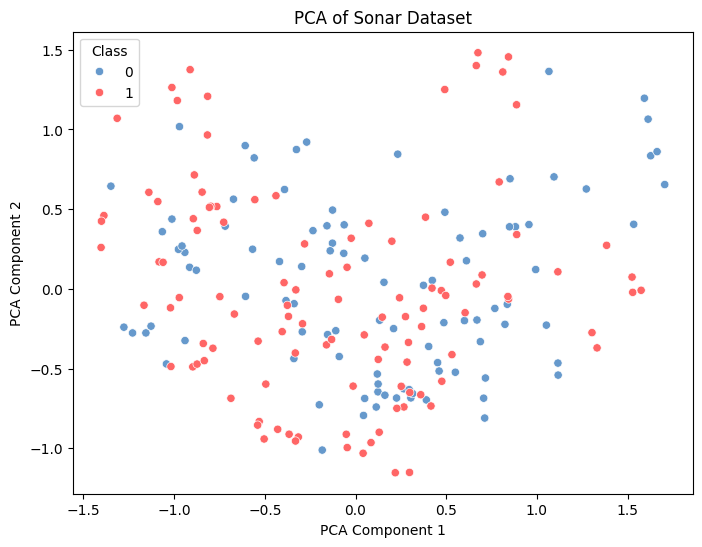

In [10]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=y, palette=['#6699CC', '#FF6666'])
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('PCA of Sonar Dataset')
plt.show()


# Baseline Model Building

## Random Forest model using all features with hyper-parameter tuning

The purpose for building this model was for a baseline comparison of performance.

In [11]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# Define the parameter grid to tune
param_grid = {
    'n_estimators': [50, 100, 200],        # Number of trees in the forest
    'max_depth': [None, 1, 2, 3,4,5],       # Maximum depth of the trees
    'min_samples_split': [2, 5, 10],       # Minimum number of samples to split a node
    'min_samples_leaf': [1, 2, 4],         # Minimum number of samples at a leaf node
}

# Instantiate a RandomForestClassifier
rf = RandomForestClassifier(random_state=42, class_weight='balanced')

# Set up GridSearchCV
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid,
                           cv=5, n_jobs=-1, verbose=2, scoring='f1')

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Get the best parameters and score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print(f"Best Parameters: {best_params}")
print(f"Best F1 Score from Cross-Validation: {best_score:.4f}")


Fitting 5 folds for each of 162 candidates, totalling 810 fits
Best Parameters: {'max_depth': 3, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100}
Best F1 Score from Cross-Validation: 0.8438


### Results for Baseline Model Random Forest Classifier with all features

Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.88      0.80        16
           1       0.91      0.81      0.86        26

    accuracy                           0.83        42
   macro avg       0.82      0.84      0.83        42
weighted avg       0.85      0.83      0.84        42



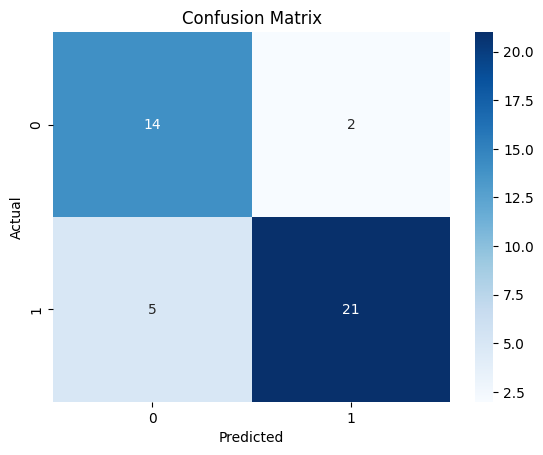

In [12]:
# Train the RandomForestClassifier with the best parameters from GridSearchCV
best_rf = grid_search.best_estimator_

# Make predictions on the test set
y_pred = best_rf.predict(X_test)

# Import metrics for evaluation
from sklearn.metrics import classification_report, confusion_matrix

# Print the classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Plot the confusion matrix
import seaborn as sns
import matplotlib.pyplot as plt
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


## Random Forest model only using top 10 features identified above

Next, I wanted to compare the baseline Random Forest Classifier to a Random forest with only the top 10 features identified during EDA.

In [23]:
# List of top 10 features identified earlier
top_features = ['Ang11', 'Ang12', 'Ang49', 'Ang9', 'Ang48' ,'Ang10', 'Ang36', 'Ang16', 'Ang52', 'Ang13']

# Create a new dataset with only the top features
X_top_features = df[top_features]
y = df['Class'].apply(lambda x: 1 if x == 'M' else 0)  # Encode labels


In [24]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_top_features, y, test_size=0.2, random_state=42)


### Results for Random Forest Classifier using Top 10 Features

Classification Report for Top 10 Features:
              precision    recall  f1-score   support

           0       0.71      0.75      0.73        16
           1       0.84      0.81      0.82        26

    accuracy                           0.79        42
   macro avg       0.77      0.78      0.78        42
weighted avg       0.79      0.79      0.79        42



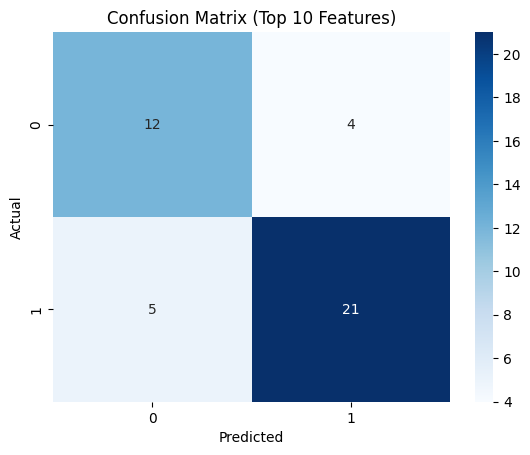

In [25]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Train a new Random Forest model using the top 10 features
rf_top_features = RandomForestClassifier(
    n_estimators=100,
    max_depth=2,
    min_samples_split=3,
    min_samples_leaf=4,
    random_state=42
)
rf_top_features.fit(X_train, y_train)

# Make predictions on the test set
y_pred_top_features = rf_top_features.predict(X_test)

# Print the classification report
print("Classification Report for Top 10 Features:")
print(classification_report(y_test, y_pred_top_features))

# Plot the confusion matrix
import seaborn as sns
import matplotlib.pyplot as plt

conf_matrix = confusion_matrix(y_test, y_pred_top_features)
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (Top 10 Features)')
plt.show()


## Hyperparameter tuning on Top 10 features 

In [16]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# Define the parameter grid to tune
param_grid = {
    'n_estimators': [1,50,100],
    'max_depth': [None, 2, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}

# Instantiate a RandomForestClassifier
rf = RandomForestClassifier(random_state=42)

# Set up GridSearchCV
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid,
                           cv=5, n_jobs=-1, verbose=2, scoring='f1')

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Get the best parameters and score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print(f"Best Parameters: {best_params}")
print(f"Best F1 Score from Cross-Validation: {best_score:.4f}")

Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best Parameters: {'max_depth': 2, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100}
Best F1 Score from Cross-Validation: 0.7913


### Model Results for Random Forest Classifer trained on top 10 features and hyper-parameter tuning

Classification Report with Best Parameters:
              precision    recall  f1-score   support

           0       0.71      0.75      0.73        16
           1       0.84      0.81      0.82        26

    accuracy                           0.79        42
   macro avg       0.77      0.78      0.78        42
weighted avg       0.79      0.79      0.79        42



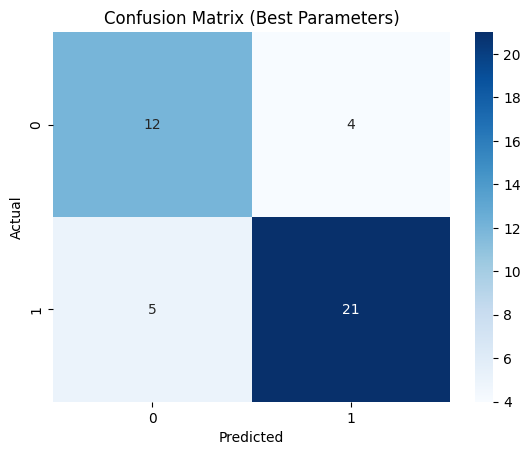

In [17]:
# Train the RandomForestClassifier with the best parameters from GridSearchCV
best_rf = grid_search.best_estimator_

# Make predictions on the test set
y_pred = best_rf.predict(X_test)

# Import metrics for evaluation
from sklearn.metrics import classification_report, confusion_matrix

# Print the classification report
print("Classification Report with Best Parameters:")
print(classification_report(y_test, y_pred))

# Plot the confusion matrix
import seaborn as sns
import matplotlib.pyplot as plt
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (Best Parameters)')
plt.show()

# Advanced Models - Gradient Boost, AdaBoost, and SVM with RBF kernel

## Determine best performing Advanced Model on Top 10 Features dataset

I chose to compare Gradient Boosting, Adaboost, and SVM with RBF Kernel as advanced models to compare to baseline Random Forest

Classification Report for Gradient Boosting:
              precision    recall  f1-score   support

           0       0.71      0.94      0.81        16
           1       0.95      0.77      0.85        26

    accuracy                           0.83        42
   macro avg       0.83      0.85      0.83        42
weighted avg       0.86      0.83      0.84        42



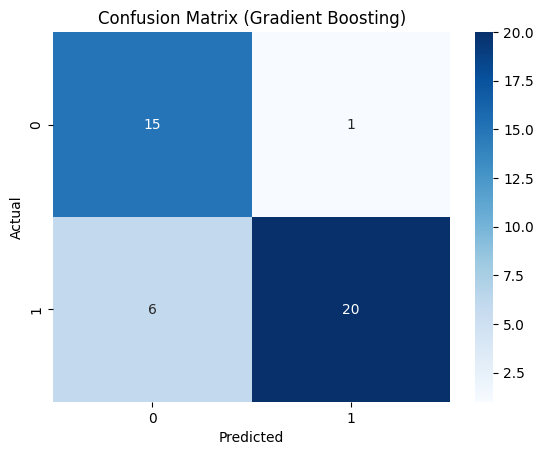

Classification Report for AdaBoost:
              precision    recall  f1-score   support

           0       0.61      0.88      0.72        16
           1       0.89      0.65      0.76        26

    accuracy                           0.74        42
   macro avg       0.75      0.76      0.74        42
weighted avg       0.79      0.74      0.74        42



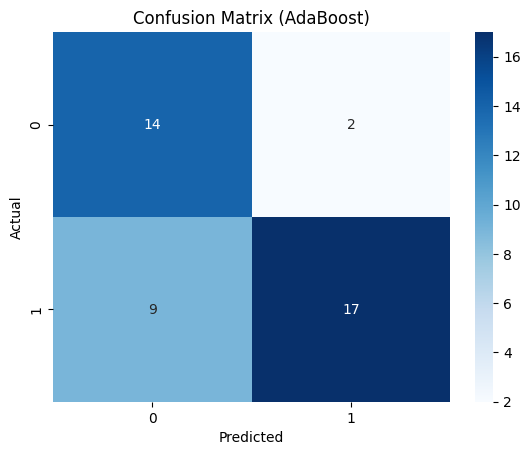

Classification Report for SVM with RBF Kernel:
              precision    recall  f1-score   support

           0       0.78      0.88      0.82        16
           1       0.92      0.85      0.88        26

    accuracy                           0.86        42
   macro avg       0.85      0.86      0.85        42
weighted avg       0.86      0.86      0.86        42



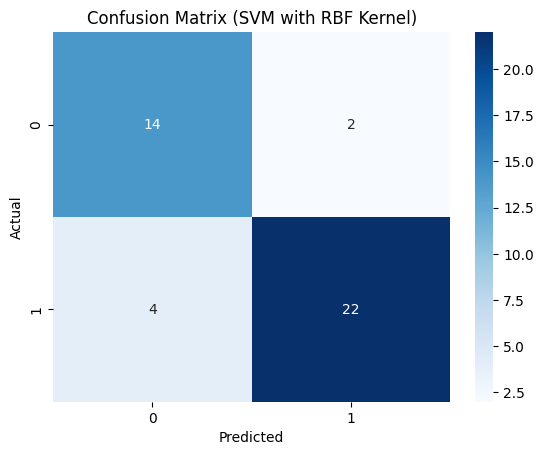

In [18]:
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix

# Prepare the dataset (using the top 10 features dataset)
X_train, X_test, y_train, y_test = train_test_split(X_top_features, y, test_size=0.2, random_state=42)

# Initialize and train each model
# 1. Gradient Boosting Classifier
gb = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
gb.fit(X_train, y_train)
y_pred_gb = gb.predict(X_test)

# 2. AdaBoost Classifier
ada = AdaBoostClassifier(n_estimators=100, learning_rate=0.1, random_state=42)
ada.fit(X_train, y_train)
y_pred_ada = ada.predict(X_test)

# 3. Support Vector Machine with RBF Kernel
svm = SVC(kernel='rbf', C=1.0, gamma='scale', random_state=42)
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)

# Evaluate Each Model
models = {
    'Gradient Boosting': y_pred_gb,
    'AdaBoost': y_pred_ada,
    'SVM with RBF Kernel': y_pred_svm
}

# Loop through models and print classification reports and confusion matrices
for model_name, y_pred in models.items():
    print(f"Classification Report for {model_name}:")
    print(classification_report(y_test, y_pred))
    conf_matrix = confusion_matrix(y_test, y_pred)
    sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'Confusion Matrix ({model_name})')
    plt.show()


## SVM Model fine tuning

Next, I fine tuned the hyper-parameters for the SVM due to it achieving the best results.

In [19]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

# Prepare the dataset (using the top 10 features dataset)
X_train, X_test, y_train, y_test = train_test_split(X_top_features, y, test_size=0.2, random_state=42)

# Define the parameter grid to tune
param_grid = {
    'C': [0.1, 1, 10, 100],      # Regularization parameter
    'gamma': [0.001, 0.01, 0.1, 1, 'scale'],  # Kernel coefficient
}



# Instantiate an SVC with RBF kernel
svm = SVC(kernel='rbf', random_state=42)

# Set up GridSearchCV
grid_search = GridSearchCV(estimator=svm, param_grid=param_grid,
                           cv=5, n_jobs=-1, verbose=2, scoring='f1')

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Get the best parameters and score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print(f"Best Parameters: {best_params}")
print(f"Best F1 Score from Cross-Validation: {best_score:.4f}")


Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best Parameters: {'C': 10, 'gamma': 'scale'}
Best F1 Score from Cross-Validation: 0.7919


### Results for SVM Model with Fine tuning of Hyper-parameters

Classification Report for Tuned SVM Model:
              precision    recall  f1-score   support

           0       0.81      0.81      0.81        16
           1       0.88      0.88      0.88        26

    accuracy                           0.86        42
   macro avg       0.85      0.85      0.85        42
weighted avg       0.86      0.86      0.86        42



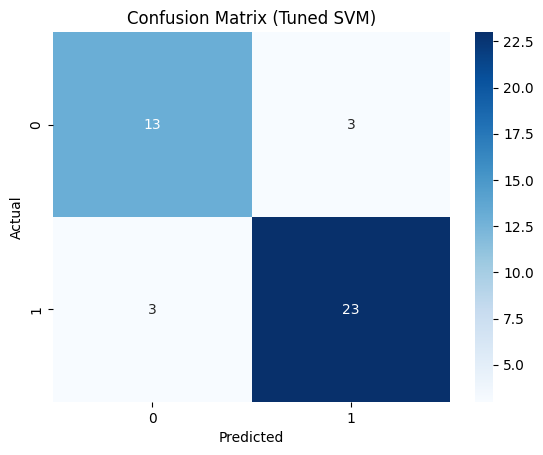

In [20]:
# Train the SVM model with the best parameters from GridSearchCV
best_svm = grid_search.best_estimator_

# Make predictions on the test set
y_pred_svm_tuned = best_svm.predict(X_test)

# Import metrics for evaluation
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Print the classification report
print("Classification Report for Tuned SVM Model:")
print(classification_report(y_test, y_pred_svm_tuned))

# Plot the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_svm_tuned)
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (Tuned SVM)')
plt.show()


## Comparing Fine-tuned SVM model performance with top 10 feature dataset and all to all feature data set 

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best Parameters for All Features: {'C': 10, 'gamma': 1}
Best F1 Score from Cross-Validation for All Features: 0.8472
Classification Report for Tuned SVM Model (All Features):
              precision    recall  f1-score   support

           0       0.88      0.94      0.91        16
           1       0.96      0.92      0.94        26

    accuracy                           0.93        42
   macro avg       0.92      0.93      0.93        42
weighted avg       0.93      0.93      0.93        42



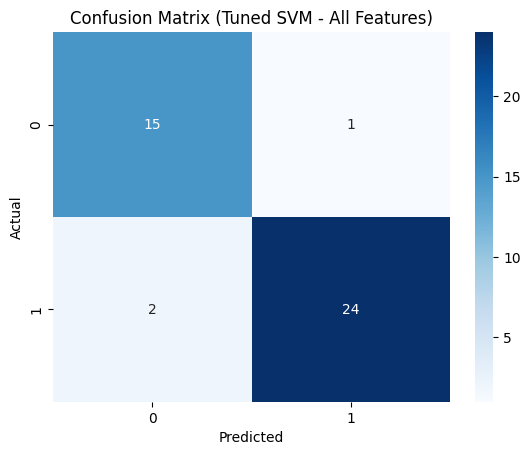

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best Parameters for Top 10 Features: {'C': 10, 'gamma': 'scale'}
Best F1 Score from Cross-Validation for Top 10 Features: 0.7919
Classification Report for Tuned SVM Model (Top 10 Features):
              precision    recall  f1-score   support

           0       0.81      0.81      0.81        16
           1       0.88      0.88      0.88        26

    accuracy                           0.86        42
   macro avg       0.85      0.85      0.85        42
weighted avg       0.86      0.86      0.86        42



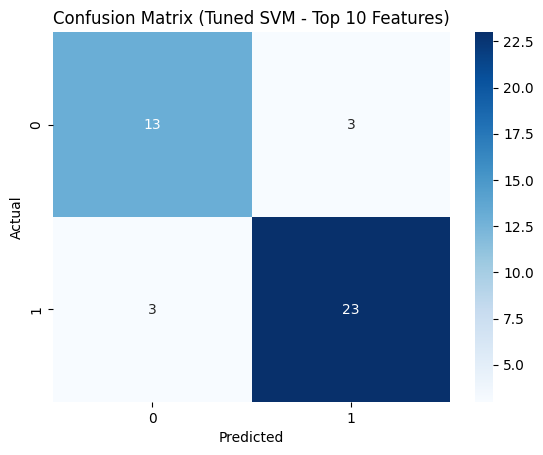

In [26]:
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming X is the full dataset with 60 features and y is the target (already encoded)
# Assuming X_top_features contains only the top 10 most important features

# Define the parameter grid to tune
param_grid = {
    'C': [0.1, 1, 10, 100],  # Regularization parameter
    'gamma': [0.001, 0.01, 0.1, 1, 'scale'],  # Kernel coefficient
}

# Function to train, tune, and evaluate an SVM model
def train_and_evaluate_svm(X, y, feature_set_name):
    # Train-test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Instantiate an SVC with RBF kernel
    svm = SVC(kernel='rbf', random_state=42)

    # Set up GridSearchCV
    grid_search = GridSearchCV(estimator=svm, param_grid=param_grid,
                               cv=5, n_jobs=-1, verbose=2, scoring='f1')

    # Fit the grid search to the data
    grid_search.fit(X_train, y_train)

    # Get the best parameters and score
    best_params = grid_search.best_params_
    best_score = grid_search.best_score_

    print(f"Best Parameters for {feature_set_name}: {best_params}")
    print(f"Best F1 Score from Cross-Validation for {feature_set_name}: {best_score:.4f}")

    # Train the SVM model with the best parameters from GridSearchCV
    best_svm = grid_search.best_estimator_

    # Make predictions on the test set
    y_pred_svm_tuned = best_svm.predict(X_test)

    # Print the classification report
    print(f"Classification Report for Tuned SVM Model ({feature_set_name}):")
    print(classification_report(y_test, y_pred_svm_tuned))

    # Plot the confusion matrix
    conf_matrix = confusion_matrix(y_test, y_pred_svm_tuned)
    sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'Confusion Matrix (Tuned SVM - {feature_set_name})')
    plt.show()

# Train, tune, and evaluate using all features (full dataset)
train_and_evaluate_svm(X, y, "All Features")

# Train, tune, and evaluate using only the top 10 features
train_and_evaluate_svm(X_top_features, y, "Top 10 Features")


# Discussions and Conclusions

The objective of this project was to build a predictive model capable of accurately classifying sonar returns as either mines or rocks. The model development process involved systematic experimentation with multiple algorithms and thoughtful feature selection, aiming to identify the most effective combination of techniques for this challenging classification problem.

### Model Building Process:

Baseline Random Forest Model:I began by building a Random Forest model using all the features in the dataset. This served as a baseline model, providing a benchmark against which other models could be compared. I performed hyperparameter tuning to optimize the model's performance, achieving a best F1 score of 0.8438 and an accuracy of 0.83. This model was used as a reference to gauge how well simpler or more advanced approaches could perform.

Random Forest with Top 10 Features:
Following the baseline Random Forest model, I wanted to explore whether simplifying the feature space could still yield competitive results. I trained another Random Forest model using only the top 10 features identified during the Exploratory Data Analysis (EDA) as the most important. Despite hyperparameter tuning, the performance was slightly poorer, with a best F1 score of 0.7913 and accuracy of 0.79. This indicated that the remaining features still carried valuable information that contributed to improving model performance.

Advanced Models with Top 10 Features:
Next, I moved on to more advanced models, aiming to improve the overall classification accuracy while retaining a reduced feature set. I chose to use Gradient Boosting, AdaBoost, and SVM with an RBF Kernel, all trained on the top 10 features dataset. Despite the poorer results from the reduced feature Random Forest model, I hypothesized that more sophisticated algorithms could extract more meaningful patterns from a reduced feature space and yield improved performance. Out of these models, the SVM with RBF Kernel performed best, achieving an accuracy of 0.86. This result encouraged further exploration of SVMs as a suitable model for this problem.

Hyperparameter Tuning of SVM with Top 10 Features:
To further optimize the results, I fine-tuned the hyperparameters of the SVM model trained on the top 10 features dataset. Despite the effort, the accuracy remained at 0.86, suggesting that the limited feature set might have constrained the model's potential. However, this step confirmed that SVMs could be competitive with reduced data, providing flexibility in cases where model complexity needs to be minimized.

SVM with All Features:
Finally, I returned to using the full feature set with the SVM model to see if the added information from all 60 features would enhance performance. After hyperparameter tuning, the SVM with all features yielded the best results across all experiments, achieving an accuracy of 0.94 and an F1 score of 0.8499. This significant improvement suggested that the extra features provided valuable context for distinguishing between mines and rocks, which was lost when using a reduced set.

### Conclusion:

The iterative process of model building provided valuable insights into the importance of feature selection and model complexity in classification tasks. The initial Random Forest model established a strong baseline, and the subsequent exploration of a reduced feature set helped determine that, while simpler models can still be effective, they may lose critical information that improves prediction accuracy. The SVM model with all features ultimately proved to be the best approach, demonstrating the importance of having access to the full range of sonar return data to maximize classification performance.

This project highlights the need to balance model simplicity with feature richness. While reducing the feature set can be advantageous for interpretability and computational efficiency, in this case, the added complexity of the full feature set significantly enhanced the model's ability to differentiate between the classes. The final model, with its high accuracy and well-tuned parameters, demonstrates the value of systematic experimentation and the careful consideration of feature importance in machine learning.